In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv

In [ ]:
# !pip install mailbox

In [ ]:
import mailbox
mboxfile = "sravan_gmail.mbox"

mbox = mailbox.mbox(mboxfile)

In [ ]:
mbox[0].keys()

In [ ]:
keys = ['Subject', 'From','Date', 'To', 'Label', 'Thread','Message-ID']
message_list = []

for message in mbox.itervalues():
    dmessage = dict(message.items())
    message_list.append({key:dmessage[key] if key in dmessage.keys() else '' for key in keys})

In [ ]:
message_list[0]

In [ ]:
with open("gmail_data.csv", 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=list(message_list[0].keys()))
    writer.writeheader()
    for data in message_list:
        writer.writerow(data)

In [2]:
# df = pd.read_csv("gmail_data.csv",parse_dates=["Date"], date_parser=pd.to_datetime) 
# Above---> Didnt work because of ParserError: Unknown string format: Wed, 30 Oct 2019 19:55:18 +0530 (GMT+05:30)

df = pd.read_csv("gmail_data.csv")

In [3]:
df.Date = df.Date.apply(lambda x: x[:-12] if str(x).endswith("(GMT+05:30)") else x)

In [4]:
df["Date_Time"] = pd.to_datetime(df.Date,utc=True,errors="coerce")   
# This is consuming more time. any alternative ?

In [5]:
# Checking for NULL values
df.isnull().sum()

Subject        8695
From              1
Date           8538
To             8584
Label         36429
Thread        36429
Message-ID    10599
Date_Time      8538
dtype: int64

In [6]:
df.drop(columns=["Message-ID","Label","Thread","Date"],inplace=True)
df = df[df.Date_Time.notnull()]  

In [7]:
df.Date_Time = df.Date_Time.dt.tz_convert("Asia/Kolkata")

In [8]:
df.sample(3)

,Subject,From,To,Date_Time
10171,Enjoy 15% off* at over 850 restaurants with St...,"""Standard Chartered Card"" <info@lucifro.com>",sravanporeddy@gmail.com,2020-02-22 15:26:27+05:30
9674,=?UTF-8?B?VGhpbmtpbmcgYWJvdXQgUm9hZHN0ZXIgVHNo...,=?UTF-8?B?TXludHJh?= <info@myntra.com>,sravanporeddy@gmail.com,2020-01-23 12:56:34+05:30
25,Latest tech now with additional savings.,DELL India <info@pbengage.payback.in>,sravanporeddy@gmail.com,2020-10-28 15:23:55+05:30


In [9]:
df.sort_values(by=["Date_Time"], ignore_index=True,inplace=True)

### Frequeny of mails Daily

In [10]:
df["Date"] = df.Date_Time.dt.date
df["Day"] = df.Date_Time.dt.strftime("%a")
df["Time"] = df.Date_Time.dt.time

In [11]:
df["Mail_Sent"] = df.From.apply(lambda x: "Yes" if str(x).endswith("<sravanporeddy@gmail.com>")\
                                else "No")
sent = df[df.Mail_Sent=="Yes"]

In [12]:
daily_count_table = df.Date.groupby(by=df["Day"]).count()
all_mails_frequency_dict = daily_count_table.to_dict()
sent_mails_table = sent.Date.groupby(by=df["Day"]).count()
sent_mails_frequency_dict = sent_mails_table.to_dict()

# df["Counter"] =1
# table = pd.pivot_table(df,index=['Day'], values=['Counter'], aggfunc=["sum"])
# table

In [13]:
weekdays = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
all_mails = []
sent_mails = []
for it in weekdays:
    if it in all_mails_frequency_dict:
        all_mails.append(all_mails_frequency_dict[it])
        sent_mails.append(sent_mails_frequency_dict[it])

received = list(np.subtract(all_mails,sent_mails))
print(all_mails)
print(sent_mails)
print(received)

[2994, 3861, 4510, 4292, 4574, 4171, 3489]
[90, 81, 73, 92, 70, 74, 80]
[2904, 3780, 4437, 4200, 4504, 4097, 3409]


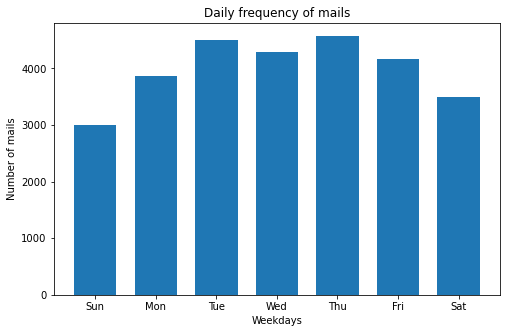

In [14]:
fig = plt.figure(figsize = (8, 5)) 
plt.bar(x=weekdays,height=all_mails,width=0.7)
plt.xlabel("Weekdays") 
plt.ylabel("Number of mails") 
plt.title("Daily frequency of mails")
plt.show()

### Stacked bar Chart for sent and recieved mails

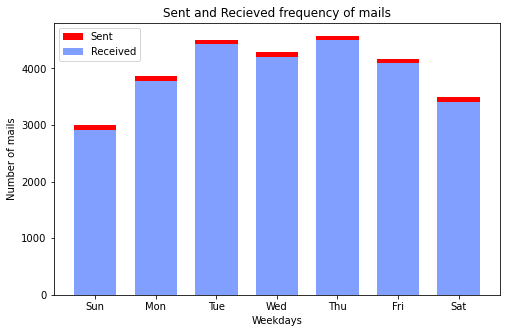

In [15]:
fig = plt.figure(figsize = (8, 5)) 

plt.bar(weekdays, sent_mails, bottom=received, width=0.7, color='r')
plt.bar(weekdays, received, width=0.7, color='#809fff')

plt.legend(labels=['Sent', 'Received'])

plt.xlabel("Weekdays") 
plt.ylabel("Number of mails") 
plt.title("Sent and Recieved frequency of mails")
plt.show()

### Scatter plot from start of Gmail Account

In [16]:
temp = df.Date.groupby(by=df["Date"]).count()

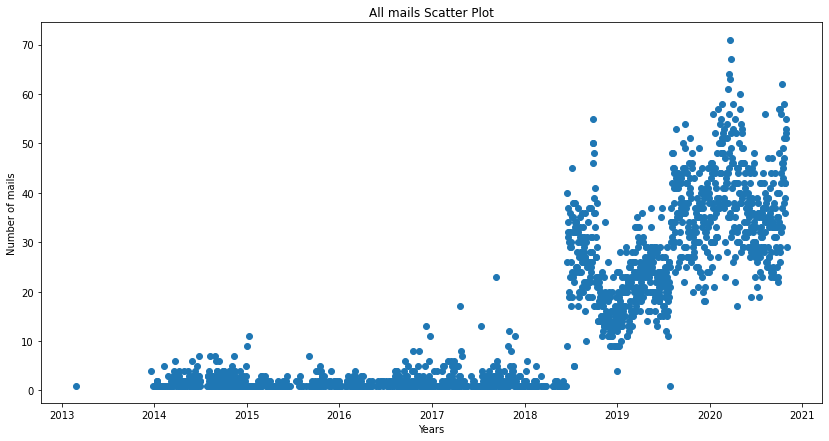

In [17]:
fig = plt.figure(figsize = (14, 7)) 

plt.scatter(temp.index,temp.values)

plt.xlabel("Years") 
plt.ylabel("Number of mails") 
plt.title("All mails Scatter Plot")
plt.show()

In [19]:
# b = [0,6,12,18,24]
l = ['0-6', '6-12','12-18','18-24']
df["hour_category"] = pd.cut(df.Date_Time.dt.hour, bins=[0,6,12,18,24],precision=0,\
           retbins=True,include_lowest=True,ordered=True,labels=l)[0]

In [23]:
df.sample(3)

,Subject,From,To,Date_Time,Date,Day,Time,Mail_Sent,hour_category
22007,Sravan kumar: 4 new job opportunities for you ...,TimesJobs Job Alert <jobalert@timesjobs.com>,sravanporeddy@gmail.com,2020-05-19 17:44:37+05:30,2020-05-19,Tue,17:44:37,No,12-18
4464,Reset your Shuttlehub.in password,Shuttlehub <support@shuttlehub.in>,sravan poreddy <sravanporeddy@gmail.com>,2018-09-30 14:45:44+05:30,2018-09-30,Sun,14:45:44,No,12-18
3755,Why are you #HereToLearn?,"""University of Michigan"" <no-reply@t.mail.cour...","""Sravan Kumar Reddy Poreddy"" <sravanporeddy@gm...",2018-09-07 00:47:55+05:30,2018-09-07,Fri,00:47:55,No,0-6


In [24]:
category_table = df.Date.groupby(by=df["hour_category"]).count()
hour_category_table_dict = category_table.to_dict()
hour_category_table_dict

{'0-6': 4094, '6-12': 8732, '12-18': 9511, '18-24': 5554}

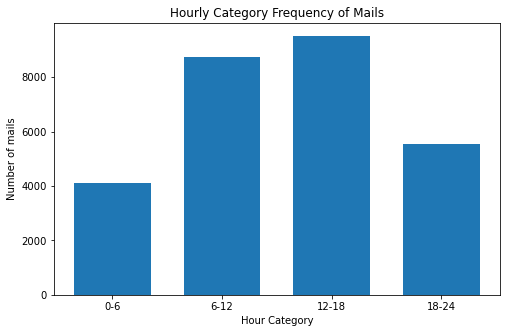

In [25]:
fig = plt.figure(figsize = (8, 5)) 
plt.bar(x=hour_category_table_dict.keys(),height=hour_category_table_dict.values(),width=0.7)
plt.xlabel("Hour Category") 
plt.ylabel("Number of mails") 
plt.title("Hourly Category Frequency of Mails")
plt.show()